In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import levene
from scipy.stats import ttest_ind


In [5]:
data = pd.read_csv("../data/CHURN_FEATURES.csv")
data = data.drop(columns=[
    'ID_VENDEDOR',
    'ID_CAMPANA',
    'ID_VENDEDOR.1',
    'ID_CAMPANA.1',
    'ID_VENDEDOR.2',
    'ID_CAMPANA.2',
    'ID_UBICACION',
    'ID_VENDEDOR.3',
    'ID_CAMPANA.3',
    'ID_VENDEDOR.4',
    'ID_CAMPANA.4',
    'ID_VENDEDOR.5',
    'ID_CAMPANA.5',
    'NUMERO_CAMPANA',
    'NUMERO_CAMPANA.1',
    'PROVINCIA',
    'DISTRITO',
    'ANIO'
])

data.drop(columns=['EDAD_VENDEDORA'], inplace=True, axis=1)
data['ANTIGUEDAD_MESES'] = data['ANTIGUEDAD_MESES'].clip(lower=0)
data.dropna(inplace=True)

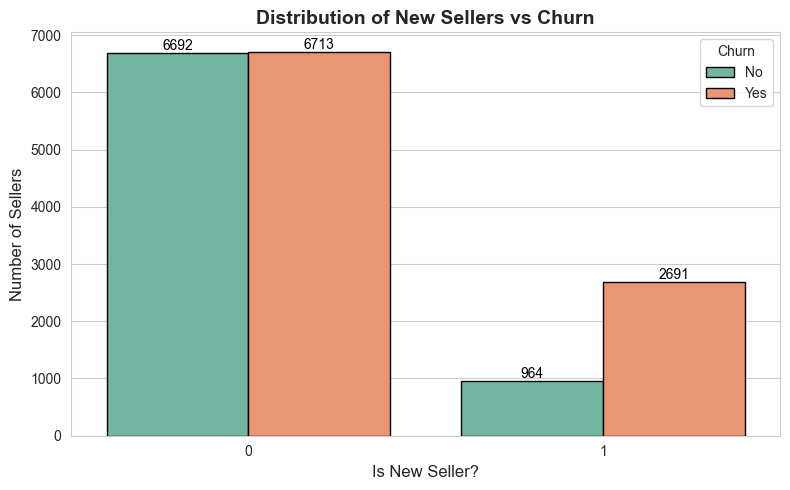

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot
ax = sns.countplot(
    x='ES_NUEVA',
    data=data,
    hue='TARGET_CHURN',
    palette='Set2',
    edgecolor='black'
)

# Titles and labels
ax.set_title('Distribution of New Sellers vs Churn', fontsize=14, weight='bold')
ax.set_xlabel('Is New Seller?', fontsize=12)
ax.set_ylabel('Number of Sellers', fontsize=12)
ax.legend(title='Churn', labels=['No', 'Yes'])

# Annotate bar values
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Statistical Testing – Levene’s Test (Variance Equality)

H₀ (Null Hypothesis):
The variance of customer tenure (in months) is equal for churned and non-churned customers.

H₁ (Alternative Hypothesis):
The variance of customer tenure (in months) is different between churned and non-churned customers.

In [8]:
from scipy.stats import levene

# Define tenure series for churned and non-churned customers
churn = data[data['TARGET_CHURN'] == 1]['ANTIGUEDAD_MESES']
no_churn = data[data['TARGET_CHURN'] == 0]['ANTIGUEDAD_MESES']

# Perform Levene's Test for equality of variances
stat, p = levene(churn, no_churn)

print(f"Levene’s test statistic: {stat:.3f}")
print(f"p-value: {p:.5f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("❌ Reject H₀: The variances are significantly different.")
else:
    print("✅ Fail to reject H₀: We assume equal variances.")


Levene’s test statistic: 16.080
p-value: 0.00006
❌ Reject H₀: The variances are significantly different.


Statistical Testing – One-sided t-test (Independent Samples)

H₀ (Null Hypothesis): The average tenure (in months) of churned customers is greater than or equal to that of non-churned customers.

H₁ (Alternative Hypothesis): The average tenure of churned customers is less than that of non-churned customers.

In [9]:
# Perform independent t-test (Welch's test since equal_var=False)
t_stat, p_value = ttest_ind(churn, no_churn, equal_var=False)

# One-tailed test: H₁ is churned customers have lower tenure
p_value_one_sided = p_value / 2

print(f"t-statistic: {t_stat:.3f}")
print(f"One-sided p-value: {p_value_one_sided:.5f}")

# Interpretation
alpha = 0.05
if (t_stat < 0) and (p_value_one_sided < alpha):
    print("✅ Reject H₀: Churned customers have significantly lower tenure.")
else:
    print("❌ Fail to reject H₀: There is not enough evidence that they have lower tenure.")


t-statistic: -11.710
One-sided p-value: 0.00000
✅ Reject H₀: Churned customers have significantly lower tenure.
